In [1]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]["favorited"])
print(all_tweets.loc[0]["user"]['location'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
False
Waterloo, Iowa


In [2]:
all_tweets["favorited"] = all_tweets["favorited"].replace({False:1,True:0})
all_tweets['possibly_sensitive'] = all_tweets['possibly_sensitive'].fillna(0)
all_tweets['quoted_status'] = all_tweets['quoted_status'].fillna(0)
all_tweets['quoted_status']

0        0
1        0
2        0
3        0
4        0
        ..
11094    0
11095    0
11096    0
11097    0
11098    0
Name: quoted_status, Length: 11099, dtype: object

In [3]:
import numpy as np
median = np.median(all_tweets["retweet_count"])

all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median, 1, 0)
all_tweets['is_viral'].value_counts()

0    5562
1    5537
Name: is_viral, dtype: int64

In [4]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)

all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)

all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)

print(all_tweets['followers_count'])
print(all_tweets['hashtag_count']) 


0         215
1         199
2         196
3        3313
4         125
         ... 
11094     509
11095     462
11096     135
11097      59
11098    1563
Name: followers_count, Length: 11099, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
11094    0
11095    0
11096    0
11097    0
11098    0
Name: hashtag_count, Length: 11099, dtype: int64


In [5]:
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']

data =all_tweets[['tweet_length','followers_count','friends_count','favorite_count','hashtag_count','possibly_sensitive']]
scaled_data = scale(data,axis = 0)

print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305 -0.03892367 -0.32045057 -0.07909277]


In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels,test_labels =train_test_split(scaled_data, labels, test_size = .2, random_state = 1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 38)
classifier.fit(train_data,train_labels)
print(classifier.score(test_data,test_labels))

0.627927927927928


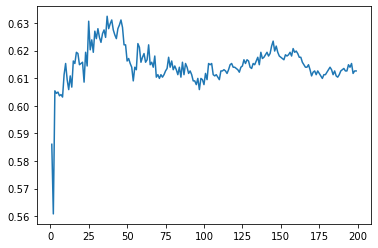

0.6324324324324324 36


In [9]:
import matplotlib.pyplot as plt

scores = []

for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data,train_labels)
    scores.append(classifier.score(test_data,test_labels))
plt.plot(range(1,200), scores)
plt.show()
maximum = np.max(scores)
k_value = scores.index(maximum)
print(maximum,k_value)